# DARES

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split


def split_data(path, filename):
    random_state = 777

    raw_data = pd.read_excel(f'{path}/{filename}')
    groups = raw_data.groupby("Fine-grained")
    grades = list(groups.groups.keys())

    train_df = pd.DataFrame(columns=["Word", "Fine-grained", "Coarse-grained", "Arabic_Filename", "Text"])
    test_df = pd.DataFrame(columns=["Word", "Fine-grained", "Coarse-grained", "Arabic_Filename", "Text"])
    validation_df = pd.DataFrame(columns=["Word", "Fine-grained", "Coarse-grained", "Arabic_Filename", "Text"])

    for grade in grades:
        grade_df = groups.get_group(grade)
        train_split, test_split = train_test_split(grade_df, test_size=0.3, random_state=random_state)
        test_split, validation_split = train_test_split(test_split, test_size=0.33, random_state=random_state)

        train_df = pd.concat([train_df, train_split], axis=0)
        test_df = pd.concat([test_df, test_split], axis=0)
        validation_df = pd.concat([validation_df, validation_split], axis=0)

    train_df.to_csv(f'{path}/train.csv', index=False, sep='\t')
    test_df.to_csv(f'{path}/test.csv', index=False, sep='\t')
    validation_df.to_csv(f'{path}/validation.csv', index=False, sep='\t')


if __name__ == '__main__':
    split_data('/content/','Paper_Dataset.xlsx')

In [57]:
dares_train_df = pd.read_csv('/content/train.csv',sep='\t')
dares_test_df = pd.read_csv('/content/test.csv',sep='\t')
dares_val_df = pd.read_csv('/content/validation.csv',sep='\t')

In [58]:
print(len(dares_train_df))
print(len(dares_test_df))
print(len(dares_val_df))

9703
2787
1380


In [59]:
dares_train_df.head()

,Word,Fine-grained,Coarse-grained,Arabic_Filename,Text,ID,Len,Filename,Sent_Num,Sent_Len,English_Filename
0,المدرسي,G1,EE,اللغة العربية,تواصل بمقترحاتك لتطوير الكتاب المدرسي. أخبر ال...,189.0,7.0,ArabicLanguage_G1_2.txt,5.0,375.0,ArabicLanguage
1,الصوت,G1,EE,العلوم,الصوت شكل آخر من أشكال الطاقة. نحن لا نستطيع أ...,19.0,5.0,Science_G1_2.txt,4.0,205.0,Science
2,الصورة,G1,EE,الرياضيات,يطلب من الطفل أن يبحث في المنزل عن أشياء عددها...,1.0,6.0,Math_G1.txt,1.0,91.0,Math
3,الزمان,G1,EE,الفنون,ارسم ثم ألون باستخدام الألوان الشمعية، من الأل...,182.0,6.0,Artistic_Education_G1.txt,4.0,461.0,Artistic_Education
4,ملف,G1,EE,المهارات الرقمية,ملف التعريف صورة افتراضية يمكن أن تكون للمعاين...,173.0,3.0,Digital_Skills_G1.txt,5.0,536.0,Digital_Skills


In [60]:
print("Domains:", dares_train_df["English_Filename"].value_counts())

Domains: English_Filename
Science                920
Islamic_Studies        835
ArabicLanguage         718
Biology                642
Arabic_Language        624
Artistic_Education     620
Physics                605
Sociology              544
Digital_Skills         486
Chemistry              453
Health                 288
Life&Family_Skills     249
Islamic                220
Critical_Thinking      194
Management             181
Computer_Sci           179
Math                   175
History                137
Geology                132
Geography              131
Ecology                130
Business               129
Tech                   129
Decision_Making        125
Finance                110
Athletics               93
AI                      89
Psychology              87
Research_Skills         83
IoT                     66
Life_Skills             51
Data_Science            45
Arts                    42
Law                     40
Professional_Skills     36
Hadith                  31
Ec

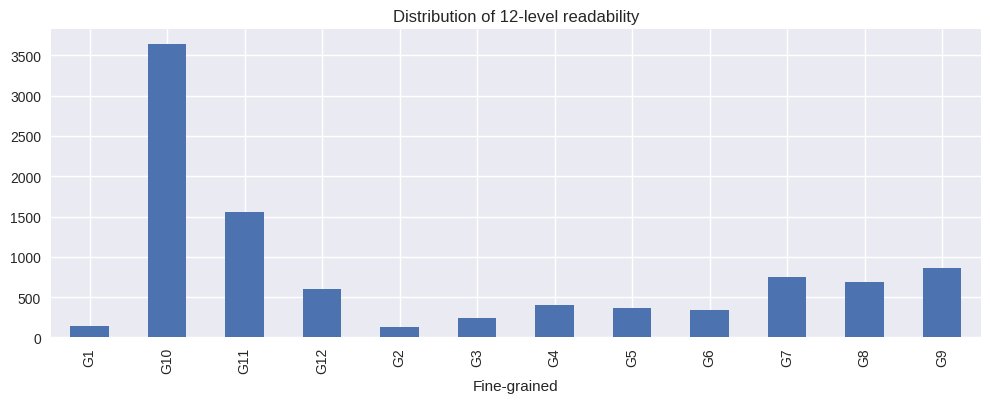

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
# Readability levels
dares_train_df["Fine-grained"].value_counts().sort_index().plot(kind="bar", figsize=(12,4))
plt.title("Distribution of 12-level readability")
plt.show()

In [62]:
DARES_GRADE_TO_BAREC = {
    'G1': 1, 'G2': 2, "G3": 3, "G4": 4, "G5": 5, "G6": 5,
    "G7": 5, "G8": 6,"G9": 6,
    "G10": 6, 'G11': 6, 'G12': 7
}

In [63]:
# Process DARES Data ( Mapping)
dares_combined_df = dares_train_df.copy()
dares_combined_df['Readability_Level_7'] = (
    dares_combined_df['Fine-grained'].map(DARES_GRADE_TO_BAREC)
)

In [64]:
def map_dares_domain(subject):
    subject = str(subject).strip().replace('_', ' ') # Clean up key
    if subject in ['Science', 'Biology', 'Physics', 'Chemistry', 'Math', 'Digital Skills', 'AI', 'IoT', 'Data Science', 'Tech', 'Computer Sci', 'Geology', 'Software Eng', 'Ecology']:
        return 'STEM'
    elif subject in ['Islamic Studies', 'ArabicLanguage', 'Arabic Language', 'Artistic Education', 'Arts', 'Hadith', 'Quran Sciences']:
        return 'Arts & Humanities'
    elif subject in ['Sociology', 'History', 'Health', 'Life&Family Skills', 'Islamic', 'Critical Thinking', 'Management', 'Geography', 'Business', 'Decision Making', 'Finance', 'Athletics', 'Psychology', 'Research Skills', 'Law', 'Professional Skills', 'Economics', 'Life Skills']:
        return 'Social Sciences'
    return 'Other'

In [66]:
dares_combined_df = dares_combined_df.rename(columns={
    'English_Filename': 'Source', "Text":"Sentence", "Filename":"Document"
})

dares_combined_df['Domain'] = dares_combined_df['Source'].apply(map_dares_domain)
dares_combined_df['Dataset_Source'] = 'DARES'

In [67]:
dares_combined_df.head(25)

,Word,Fine-grained,Coarse-grained,Arabic_Filename,Sentence,ID,Len,Document,Sent_Num,Sent_Len,Source,Readability_Level_7,Domain,Dataset_Source
0,المدرسي,G1,EE,اللغة العربية,تواصل بمقترحاتك لتطوير الكتاب المدرسي. أخبر ال...,189.0,7.0,ArabicLanguage_G1_2.txt,5.0,375.0,ArabicLanguage,1,Arts & Humanities,DARES
1,الصوت,G1,EE,العلوم,الصوت شكل آخر من أشكال الطاقة. نحن لا نستطيع أ...,19.0,5.0,Science_G1_2.txt,4.0,205.0,Science,1,STEM,DARES
2,الصورة,G1,EE,الرياضيات,يطلب من الطفل أن يبحث في المنزل عن أشياء عددها...,1.0,6.0,Math_G1.txt,1.0,91.0,Math,1,STEM,DARES
3,الزمان,G1,EE,الفنون,ارسم ثم ألون باستخدام الألوان الشمعية، من الأل...,182.0,6.0,Artistic_Education_G1.txt,4.0,461.0,Artistic_Education,1,Arts & Humanities,DARES
4,ملف,G1,EE,المهارات الرقمية,ملف التعريف صورة افتراضية يمكن أن تكون للمعاين...,173.0,3.0,Digital_Skills_G1.txt,5.0,536.0,Digital_Skills,1,STEM,DARES
5,الشيفرة,G1,EE,المهارات الرقمية,تحديث الشيفرة لتحقيق الأهداف المطلوبة تم ترتيب...,121.0,7.0,Digital_Skills_G1.txt,1.0,71.0,Digital_Skills,1,STEM,DARES
6,العقلية,G1,EE,العلوم,أثبتت فلسفة الكتاب أهمية تعلم الطالب الطرق الع...,164.0,7.0,Science_G1.txt,5.0,482.0,Science,1,STEM,DARES
7,التعريف,G1,EE,اللغة العربية,متى يتم الاحتفال باليوم الوطني؟ ما الهدف من هذ...,29.0,7.0,ArabicLanguage_G1_2.txt,1.0,247.0,ArabicLanguage,1,Arts & Humanities,DARES
8,الحكاية,G1,EE,اللغة العربية,أين يجتمع الأطفال يوم العيد؟ لماذا كانت الشجرة...,75.0,7.0,ArabicLanguage_G1_2.txt,1.0,314.0,ArabicLanguage,1,Arts & Humanities,DARES
9,العالمي,G1,EE,المهارات الحياتية,متى يجب أن أغسل يدي بالماء والصابون؟ يحتفل الع...,73.0,7.0,Life&Family_Skills_G1_2.txt,3.0,311.0,Life&Family_Skills,1,Social Sciences,DARES


In [43]:
dares_combined_df.head()

,Word,Fine-grained,Coarse-grained,Arabic_Filename,Text,ID,Len,Filename,Sent_Num,Sent_Len,English_Filename,Readability_Level_7
0,المدرسي,G1,EE,اللغة العربية,تواصل بمقترحاتك لتطوير الكتاب المدرسي. أخبر ال...,189.0,7.0,ArabicLanguage_G1_2.txt,5.0,375.0,ArabicLanguage,1
1,الصوت,G1,EE,العلوم,الصوت شكل آخر من أشكال الطاقة. نحن لا نستطيع أ...,19.0,5.0,Science_G1_2.txt,4.0,205.0,Science,1
2,الصورة,G1,EE,الرياضيات,يطلب من الطفل أن يبحث في المنزل عن أشياء عددها...,1.0,6.0,Math_G1.txt,1.0,91.0,Math,1
3,الزمان,G1,EE,الفنون,ارسم ثم ألون باستخدام الألوان الشمعية، من الأل...,182.0,6.0,Artistic_Education_G1.txt,4.0,461.0,Artistic_Education,1
4,ملف,G1,EE,المهارات الرقمية,ملف التعريف صورة افتراضية يمكن أن تكون للمعاين...,173.0,3.0,Digital_Skills_G1.txt,5.0,536.0,Digital_Skills,1


# BAREC

In [27]:
from datasets import load_dataset
# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("CAMeL-Lab/BAREC-Corpus-v1.0")

In [28]:
for split in ds:
    print(split, len(ds[split]))

train 54845
dev 7310
test 7286


In [30]:
import pandas as pd
BAREC_df = pd.DataFrame(ds["train"])
BAREC_df.head(20)

,ID,Sentence,Word_Count,Word,Lex,D3Tok,D3Lex,Readability_Level,Readability_Level_19,Readability_Level_7,Readability_Level_5,Readability_Level_3,Annotator,Document,Source,Book,Author,Domain,Text_Class
0,10100290001,مجلة كل الأولاد وكل البنات,5,مجلة كل الأولاد وكل البنات,مجلة كل ولد كل بنت,مجلة كل ال+ أولاد و+ كل ال+ بنات,مجلة كل ال+ ولد و+ كل ال+ بنت,7-zay,7,2,1,1,A2,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
1,10100290002,ماجد,1,ماجد,ماجد,ماجد,ماجد,1-alif,1,1,1,1,A2,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
2,10100290003,الأربعاء 21 يناير 1987,4,الأربعاء 21 يناير 1987,أربعاء 21 يناير 1987,ال+ أربعاء 21 يناير 1987,ال+ أربعاء 21 يناير 1987,8-Ha,8,3,2,1,A3,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
3,10100290004,الموافق 21 جمادى الأول 1407هــ,6,الموافق 21 جمادى الأول 1407ه,موافق 21 جمادى أول 1407 ه,ال+ موافق 21 جمادى ال+ أول 1407 ه,ال+ موافق 21 جمادى ال+ أول 1407 ه,7-zay,7,2,1,1,A3,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
4,10100290005,السنة الثامنة,2,السنة الثامنة,سنة ثامن,ال+ سنة ال+ ثامنة,ال+ سنة ال+ ثامن,5-ha,5,2,1,1,A4,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
5,10100290006,العدد 413,2,العدد 413,عدد 413,ال+ عدد 413,ال+ عدد 413,5-ha,5,2,1,1,A2,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
6,10100290007,الثمن درهمان,2,الثمن درهمان,ثمن درهم,ال+ ثمن درهمان,ال+ ثمن درهم,5-ha,5,2,1,1,A3,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
7,10100290008,عصابة الخمسة.. والمستحيلات الثلاثة,6,عصابة الخمسة . . والمستحيلات الثلاثة,عصابة خمس . . مستحيل ثلاث,عصابة ال+ خمسة . . و+ ال+ مستحيلات ال+ ثلاثة,عصابة ال+ خمس . . و+ ال+ مستحيل ال+ ثلاث,6-waw,6,2,1,1,A2,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
8,10100290009,قصة كاملة..,4,قصة كاملة . .,قصة كامل . .,قصة كاملة . .,قصة كامل . .,2-ba,2,1,1,1,A3,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
9,10100290010,صفحة (5),4,صفحة ( 5 ),صفحة ( 5 ),صفحة ( 5 ),صفحة ( 5 ),2-ba,2,1,1,1,A3,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational


In [ ]:
print("Domains:", train_df["Domain"].value_counts())

Domains: Domain
Arts & Humanities    39898
Social Sciences      11153
STEM                  3794
Name: count, dtype: int64


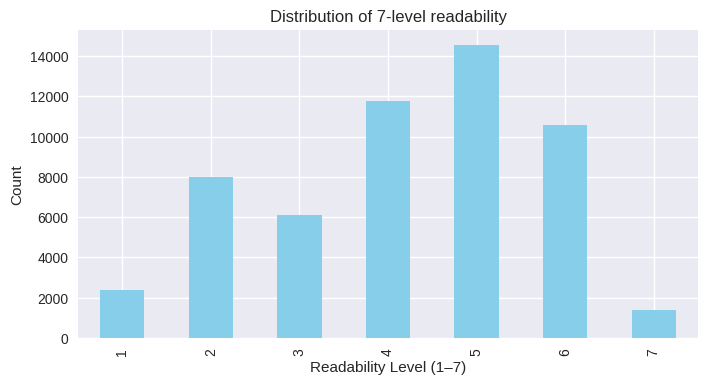

In [ ]:
# 7 levels
train_df["Readability_Level_7"].value_counts().sort_index().plot(
    kind="bar", figsize=(8,4), color="skyblue"
)
plt.title("Distribution of 7-level readability")
plt.xlabel("Readability Level (1–7)")
plt.ylabel("Count")
plt.show()

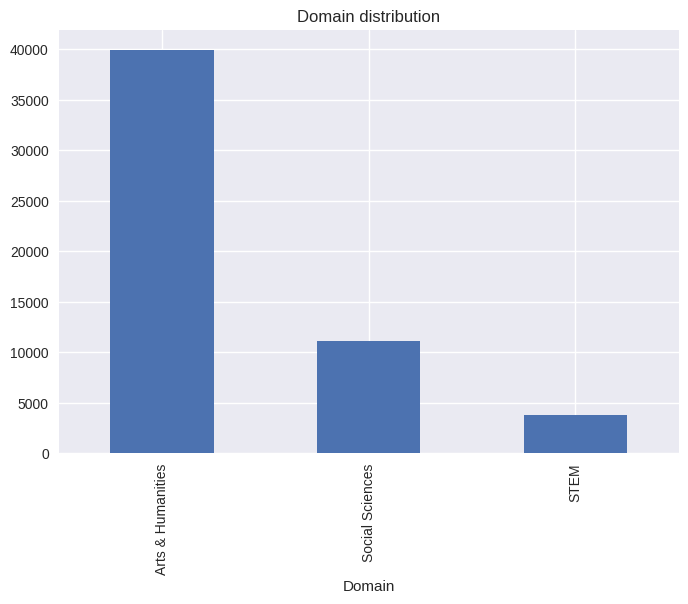

In [ ]:
# Domain
train_df["Domain"].value_counts().plot(kind="bar", title="Domain distribution")
plt.show()


# Combined

In [68]:
# Handle Metadata
BAREC_df['Dataset_Source'] = 'BAREC'


In [71]:
combined_data = pd.concat([BAREC_df, dares_combined_df], ignore_index=True)

In [72]:
combined_data.head()

,ID,Sentence,Word_Count,Word,Lex,D3Tok,D3Lex,Readability_Level,Readability_Level_19,Readability_Level_7,...,Author,Domain,Text_Class,Dataset_Source,Fine-grained,Coarse-grained,Arabic_Filename,Len,Sent_Num,Sent_Len
0,1.010029e+10,مجلة كل الأولاد وكل البنات,5.0,مجلة كل الأولاد وكل البنات,مجلة كل ولد كل بنت,مجلة كل ال+ أولاد و+ كل ال+ بنات,مجلة كل ال+ ولد و+ كل ال+ بنت,7-zay,7.0,2,...,#,Arts & Humanities,Foundational,BAREC,NaN,NaN,NaN,NaN,NaN,NaN
1,1.010029e+10,ماجد,1.0,ماجد,ماجد,ماجد,ماجد,1-alif,1.0,1,...,#,Arts & Humanities,Foundational,BAREC,NaN,NaN,NaN,NaN,NaN,NaN
2,1.010029e+10,الأربعاء 21 يناير 1987,4.0,الأربعاء 21 يناير 1987,أربعاء 21 يناير 1987,ال+ أربعاء 21 يناير 1987,ال+ أربعاء 21 يناير 1987,8-Ha,8.0,3,...,#,Arts & Humanities,Foundational,BAREC,NaN,NaN,NaN,NaN,NaN,NaN
3,1.010029e+10,الموافق 21 جمادى الأول 1407هــ,6.0,الموافق 21 جمادى الأول 1407ه,موافق 21 جمادى أول 1407 ه,ال+ موافق 21 جمادى ال+ أول 1407 ه,ال+ موافق 21 جمادى ال+ أول 1407 ه,7-zay,7.0,2,...,#,Arts & Humanities,Foundational,BAREC,NaN,NaN,NaN,NaN,NaN,NaN
4,1.010029e+10,السنة الثامنة,2.0,السنة الثامنة,سنة ثامن,ال+ سنة ال+ ثامنة,ال+ سنة ال+ ثامن,5-ha,5.0,2,...,#,Arts & Humanities,Foundational,BAREC,NaN,NaN,NaN,NaN,NaN,NaN


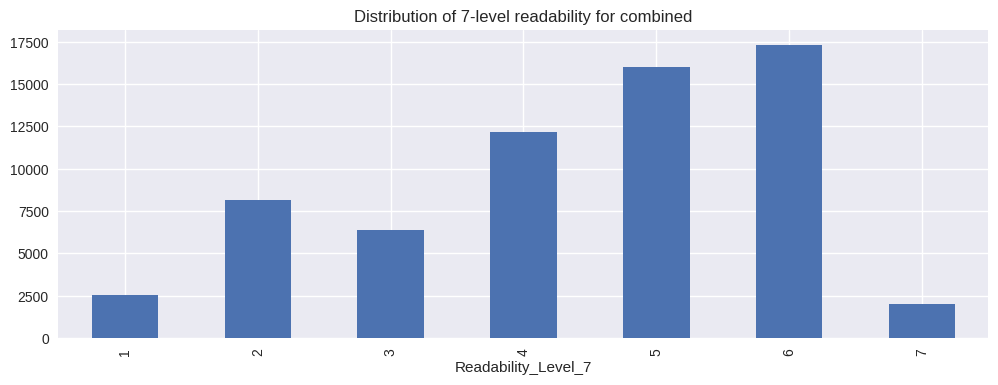

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
# Readability levels
combined_data["Readability_Level_7"].value_counts().sort_index().plot(kind="bar", figsize=(12,4))
plt.title("Distribution of 7-level readability for combined")
plt.show()

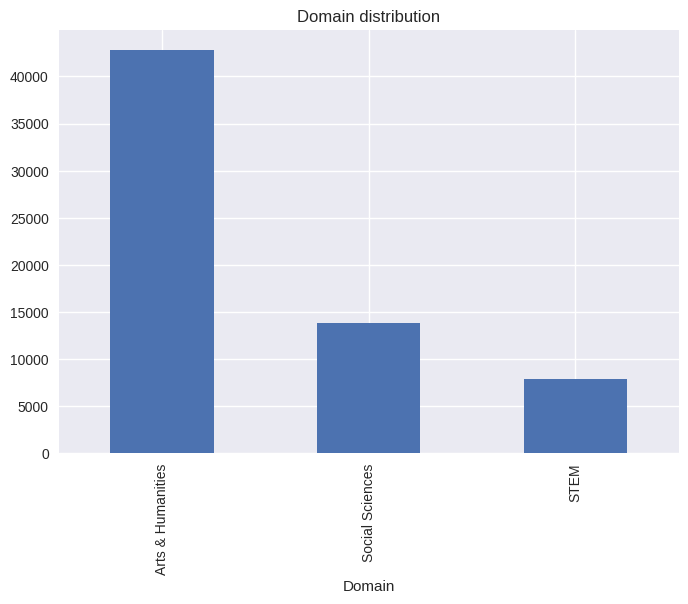

In [75]:
# Domain
combined_data["Domain"].value_counts().plot(kind="bar", title="Domain distribution")
plt.show()